In [1]:
from torchvision.datasets import ImageFolder

from torch.utils.data import DataLoader, SubsetRandomSampler
from torch.optim import Adam

import numpy as np

from config import *
from utils import test_augmentation, train_augmentation

In [2]:
# it is impossible change augmentations if ImageFolder split via random_split
train_data = ImageFolder(TRAIN_DATA, transform=train_augmentation)
valid_data = ImageFolder(TRAIN_DATA, transform=test_augmentation)

# obtain training indices
indices = np.arange(len(train_data))
np.random.shuffle(indices)
split = int(0.7 * len(train_data))
train_idx, valid_idx = indices[split:], indices[:split]

# prepare data loaders
train_loader = DataLoader(
	train_data, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(train_idx), num_workers=12
)
valid_loader = DataLoader(
	train_data, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(valid_idx), num_workers=12
)

In [3]:
from engine import *

In [4]:
lr = 1e-3

model = get_model().cuda()
model.train()
optimizer = Adam(model.parameters(), lr)
loss_function = nn.CrossEntropyLoss()

Train batch: 200 train loss: 2.3046, train accuracy: 0.1103
Train batch: 400 train loss: 2.2976, train accuracy: 0.1135
Train Epoch: 0 train loss: 2.2977, train accuracy: 0.1169  test accuracy: 0.1325
Train batch: 200 train loss: 2.2141, train accuracy: 0.1318
Train batch: 400 train loss: 2.2225, train accuracy: 0.143
Train Epoch: 1 train loss: 2.2298, train accuracy: 0.1453  test accuracy: 0.1627
Train batch: 200 train loss: 2.192, train accuracy: 0.1476
Train batch: 400 train loss: 2.1863, train accuracy: 0.1521
Train Epoch: 2 train loss: 2.191, train accuracy: 0.1523  test accuracy: 0.1273
Train batch: 200 train loss: 2.1712, train accuracy: 0.1434
Train batch: 400 train loss: 2.167, train accuracy: 0.1625
Train Epoch: 3 train loss: 2.1773, train accuracy: 0.1622  test accuracy: 0.1917
Train batch: 200 train loss: 2.1467, train accuracy: 0.165
Train batch: 400 train loss: 2.1491, train accuracy: 0.1708
Train Epoch: 4 train loss: 2.1539, train accuracy: 0.1729  test accuracy: 0.2028


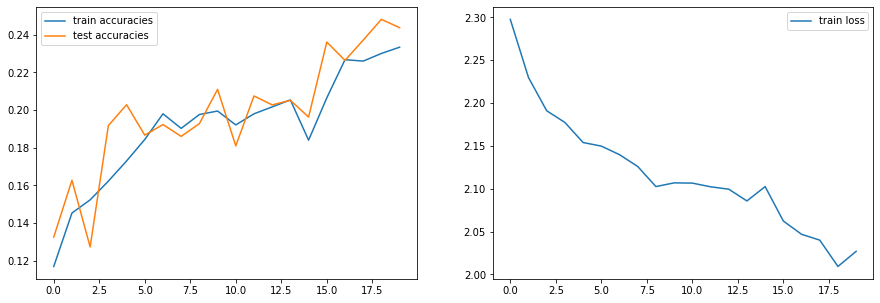

In [8]:
plot_result(
	*train_classification(
		20, model, train_loader, valid_loader, loss_function, optimizer, noti_rate=200
	)
)

In [9]:
torch.save(model, os.path.join(WEIGHT_PATH, "classification_20.model"))

Train Epoch: 0 train loss: 1.9971, train accuracy: 0.2448  test accuracy: 0.2637
Train Epoch: 1 train loss: 1.981, train accuracy: 0.2577  test accuracy: 0.2566
Train Epoch: 2 train loss: 1.9795, train accuracy: 0.25  test accuracy: 0.2683
Train Epoch: 3 train loss: 1.9384, train accuracy: 0.278  test accuracy: 0.2746
Train Epoch: 4 train loss: 1.9271, train accuracy: 0.2954  test accuracy: 0.2894
Train Epoch: 5 train loss: 1.9258, train accuracy: 0.2883  test accuracy: 0.2982
Train Epoch: 6 train loss: 1.8885, train accuracy: 0.3038  test accuracy: 0.2858
Train Epoch: 7 train loss: 1.8847, train accuracy: 0.2987  test accuracy: 0.3114
Train Epoch: 8 train loss: 1.866, train accuracy: 0.3131  test accuracy: 0.2949
Train Epoch: 9 train loss: 1.8386, train accuracy: 0.3156  test accuracy: 0.3271
Train Epoch: 10 train loss: 1.8281, train accuracy: 0.3204  test accuracy: 0.3244
Train Epoch: 11 train loss: 1.8386, train accuracy: 0.3352  test accuracy: 0.3157
Train Epoch: 12 train loss: 1.8

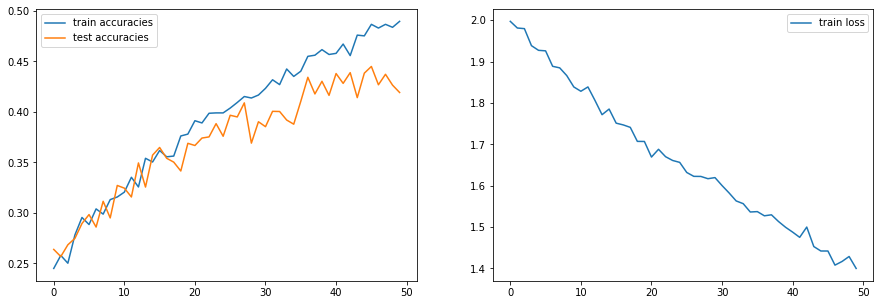

In [6]:
plot_result(
	*train_classification(
		50, model, train_loader, valid_loader, loss_function, optimizer, noti_rate=len(train_data) + 1
	)
)

In [7]:
torch.save(model, os.path.join(WEIGHT_PATH, "classification_70.model"))

In [8]:
plot_result(
	*train_classification(
		30, model, train_loader, valid_loader, loss_function, optimizer, noti_rate=len(train_data) + 1
	)
)

Train Epoch: 0 train loss: 1.4184, train accuracy: 0.476  test accuracy: 0.4383
Train Epoch: 1 train loss: 1.3886, train accuracy: 0.5041  test accuracy: 0.4423
Train Epoch: 2 train loss: 1.3879, train accuracy: 0.5018  test accuracy: 0.4383
Train Epoch: 3 train loss: 1.3766, train accuracy: 0.5044  test accuracy: 0.4352
Train Epoch: 4 train loss: 1.3533, train accuracy: 0.5081  test accuracy: 0.4444
Train Epoch: 5 train loss: 1.3373, train accuracy: 0.5162  test accuracy: 0.4563
Train Epoch: 6 train loss: 1.3476, train accuracy: 0.517  test accuracy: 0.4778
Train Epoch: 7 train loss: 1.3076, train accuracy: 0.5265  test accuracy: 0.4843
Train Epoch: 8 train loss: 1.3158, train accuracy: 0.5391  test accuracy: 0.4765
Train Epoch: 9 train loss: 1.2869, train accuracy: 0.5358  test accuracy: 0.4421
Train Epoch: 10 train loss: 1.3268, train accuracy: 0.5254  test accuracy: 0.4834


KeyboardInterrupt: 

In [14]:
torch.save(model, os.path.join(WEIGHT_PATH, "classification_75.model"))